Справочный материал:

ML_5_1_scikit-learn_персептрон.pdf

ML_5_2_scikit-learn_логист_регрессия.pdf

ML_5_3_scikit-learn_регуляризация

ML_5_4_scikit-learn_мет_опорн_вект.pdf

Задания.
1. При помощи функции make_blobs() из модуля sklearn.datasets (см. пример ниже) сгенерировать
исходные данные для задачи классификации:

– матрицу признаков, содержащую по два признака для 500 примеров;

– массив целевых меток, представляющий два класса.

Построить график, отображающий распределение классов в пространстве признаков.
Вывести на печать:

– размерности массивов признаков и целевых меток;

– массив уникальных меток классов.
2. Выполнить разделение набора данных на тренировочный и тестовый наборы. Вывести на печать размерности
полученных массивов.
3. Выполнить масштабирование признаков.
4. Решить задачу классификации с использованием:

– персептронной модели;

– модели логистической регрессии;

– метода опорных векторов.

5. Проверить работу классификатора на тестовых данных. Определить и вывести на печать:

– число неверно классифицированных образов;

– средние количества ошибочных классификаций на тренировочных и тестовых
данных;

– "верность" классификации.

– вероятности принадлежности к различным классам образцов № 10, 20, 100 тестовой выборки
(только для модели логистической регрессии).
6. Построить график области решений при помощи функции plot_decision_regions из модуля
Useful_Functions
7. Сделать выводы по проделанной работе.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC


# Задание 1
При помощи функции make_blobs() из модуля sklearn.datasets (см. пример ниже) сгенерировать исходные данные для задачи классификации:

– матрицу признаков, содержащую по два признака для 500 примеров;

– массив целевых меток, представляющий два класса.

Построить график, отображающий распределение классов в пространстве признаков. Вывести на печать:

– размерности массивов признаков и целевых меток;

– массив уникальных меток классов.

In [2]:
x, y = make_blobs(500, 2,  centers=2, random_state=3, cluster_std=2.8)

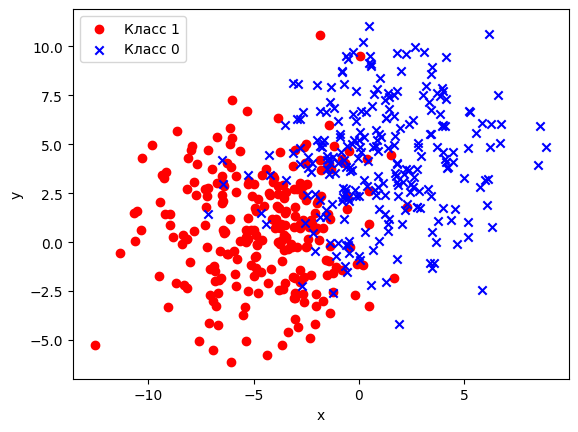

In [3]:
plt.scatter(x[y==1, 0], x[y==1, 1], color='red', marker='o', label='Класс 1')
plt.scatter(x[y==0, 0], x[y==0, 1], color='blue', marker='x', label='Класс 0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [4]:
print(f'''Размерность массива признаков: {x.shape}
Размерность целевых признаков: {y.shape}
Уникальные метки классов: {np.unique(y)}''')

Размерность массива признаков: (500, 2)
Размерность целевых признаков: (500,)
Уникальные метки классов: [0 1]


# Задание 2

Выполнить разделение набора данных на тренировочный и тестовый наборы. Вывести на печать размерности полученных массивов.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13, stratify=y)

In [6]:
print(f'''Обучающий набор:
Размерность массива признаков: {x_train.shape}
Размерность целевых признаков: {y_train.shape}

Тестовый набор:
Размерность массива признаков: {x_test.shape}
Размерность целевых признаков: {y_test.shape}''')

Обучающий набор:
Размерность массива признаков: (400, 2)
Размерность целевых признаков: (400,)

Тестовый набор:
Размерность массива признаков: (100, 2)
Размерность целевых признаков: (100,)


# Задание 3
Выполнить масштабирование признаков.

In [7]:
standard_scaler = StandardScaler()

standard_scaler.fit(x_train)

x_train_scaled = standard_scaler.transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

# Задание 4
Решить задачу классификации с использованием:

– персептронной модели;

– модели логистической регрессии;

– метода опорных векторов.

In [8]:
perceptron = Perceptron(max_iter=40, eta0=0.1, random_state=0)
perceptron.fit(x_train_scaled, y_train)

Perceptron(eta0=0.1, max_iter=40)

In [9]:
logistic_regression = LogisticRegression(C=1000.0, random_state=0)
logistic_regression.fit(x_train_scaled, y_train)

LogisticRegression(C=1000.0, random_state=0)

In [10]:
svc = SVC(kernel='linear', C=1.0, random_state=0)
svc.fit(x_train_scaled, y_train)

SVC(kernel='linear', random_state=0)

# Задание 5

Проверить работу классификатора на тестовых данных. Определить и вывести на печать:

– число неверно классифицированных образов;

– средние количества ошибочных классификаций на тренировочных и тестовых данных;

– "верность" классификации.

– вероятности принадлежности к различным классам образцов № 10, 20, 100 тестовой выборки (только для модели логистической регрессии).

In [11]:
y_pred_perceptron = perceptron.predict(x_test_scaled)
y_pred_train_perceptron = perceptron.predict(x_train_scaled)
mean_mistakes_perceptron = ((y_test!=y_pred_perceptron).sum() + (y_train!=y_pred_train_perceptron).sum())/2

print(f'''Число неверно классифицированных образов: {(y_test!=y_pred_perceptron).sum()}''')
print(f'''Срднее количество ошибочных классификаций на тренировочных и тестовых данных: {mean_mistakes_perceptron}''')
print(f'''Верность классификации: {accuracy_score(y_test, y_pred_perceptron)}''')

Число неверно классифицированных образов: 27
Срднее количество ошибочных классификаций на тренировочных и тестовых данных: 79.5
Верность классификации: 0.73


In [12]:
y_pred_log_reg = logistic_regression.predict(x_test_scaled)
y_pred_train_log_reg = logistic_regression.predict(x_train_scaled)
mean_mistakes_log_reg = ((y_test!=y_pred_log_reg).sum() + (y_train!=y_pred_train_log_reg).sum())/2

# Принадлежности к различным классам образцов 10, 20, 100:
# Так как нумерация начинается с 0, то 10-ый образец - это 9 по индексы,
# 20 - 19 по индексу и 100 - 99 по индексу
proba_10 = logistic_regression.predict_proba(x_test_scaled[9, :].reshape(1, -1))
proba_20 = logistic_regression.predict_proba(x_test_scaled[19, :].reshape(1, -1))
proba_100 = logistic_regression.predict_proba(x_test_scaled[99, :].reshape(1, -1))

print(f'''Число неверно классифицированных образов: {(y_test!=y_pred_log_reg).sum()}''')
print(f'''Срднее количество ошибочных классификаций на тренировочных и тестовых данных: {mean_mistakes_log_reg}''')
print(f'''Верность классификации: {accuracy_score(y_test, y_pred_log_reg)}''')
print(f'''Вероятность принадлежности к различным классам образца 10 тестовой выборки: {proba_10}''')
print(f'''Вероятность принадлежности к различным классам образца 20 тестовой выборки: {proba_20}''')
print(f'''Вероятность принадлежности к различным классам образца 100 тестовой выборки: {proba_100}''')

Число неверно классифицированных образов: 9
Срднее количество ошибочных классификаций на тренировочных и тестовых данных: 27.5
Верность классификации: 0.91
Вероятность принадлежности к различным классам образца 10 тестовой выборки: [[0.36942997 0.63057003]]
Вероятность принадлежности к различным классам образца 20 тестовой выборки: [[0.03969404 0.96030596]]
Вероятность принадлежности к различным классам образца 100 тестовой выборки: [[0.90606567 0.09393433]]


In [13]:
y_pred_svc = svc.predict(x_test_scaled)
y_pred_train_svc = svc.predict(x_train_scaled)
mean_mistakes_svc = ((y_test!=y_pred_svc).sum() + (y_train!=y_pred_train_svc).sum())/2

print(f'''Число неверно классифицированных образов: {(y_test!=y_pred_svc).sum()}''')
print(f'''Срднее количество ошибочных классификаций на тренировочных и тестовых данных: {mean_mistakes_svc}''')
print(f'''Верность классификации: {accuracy_score(y_test, y_pred_svc)}''')

Число неверно классифицированных образов: 10
Срднее количество ошибочных классификаций на тренировочных и тестовых данных: 28.0
Верность классификации: 0.9


# Задание 6


Построить график области решений при помощи функции plot_decision_regions из модуля Useful_Functions

In [14]:
def plotDecisionRegions(x, y, classifier, resolution=0.02, test_idx=None):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1
    x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
                    edgecolor='black', marker = markers[idx], label=cl)
        if test_idx:
            x_test = x[test_idx, :]
            plt.scatter(x_test[:, 0], x_test[:, 1], c='', alpha=1.0,
                        edgecolor='black', linewidths=1, marker='o', s=120,
                        label='test set')

<ipython-input-14-97b4413d9f40>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


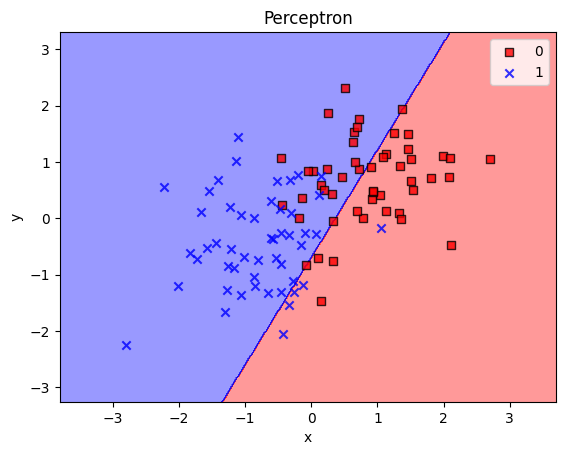

In [15]:
plotDecisionRegions(x_test_scaled, y_test, perceptron)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Perceptron')
plt.show()

<ipython-input-14-97b4413d9f40>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


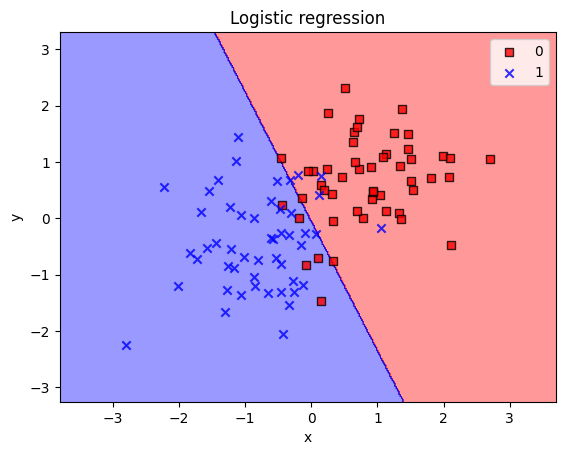

In [16]:
plotDecisionRegions(x_test_scaled, y_test, logistic_regression)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Logistic regression')
plt.show()

<ipython-input-14-97b4413d9f40>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


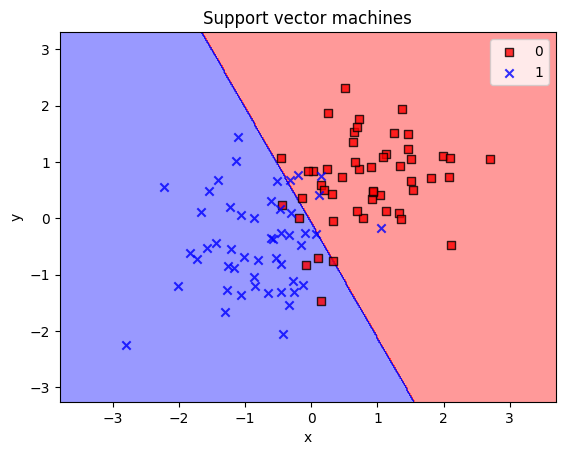

In [17]:
plotDecisionRegions(x_test_scaled, y_test, svc)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Support vector machines')
plt.show()

# Задание 7

Сделать выводы по проделанной работе.

В ходе лабораторной работы были изучены модели линейной классификации для линейно-разделимых объектов. В качестве данных для обучения были использованы наборы случаных точек, разбитых на 2 класса.

С помощью train_test_split выборка была разбита на обучающую и тестовую и далее стандартизирована с испльзованием StandardScaler. Данные были приведены в вид нормального распределения где среднее значение 0, а стандартное отклонение 1.

Далее, для классификации были использованы 3 модели:

- перцептрон
- логистическая регрессия
- метод опроных векторов

Перцептрон показал результаты хуже двух других моделей. Точность распознования составляет 73% в то время как у логистической регрессии 91%, а у метода опроных векторов 90%.

По итогам работы алгоритмов были выведены области решений, которые наглядно показали разделение данных каждой моделью на обучающей и тестовой выборке